<a href="https://colab.research.google.com/github/DzakyFawwaz/gejalaku-app/blob/main/gejalaku-ml/modeling/TF_Decision_Forests_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset penyakit dan gejalanya
url1='https://drive.google.com/file/d/1rn3qjDsP_3SBsM_nJQoK272_sPH42uWt/view?usp=sharing'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df_disease = pd.read_csv(url1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Infeksi jamur,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Infeksi jamur,gatal,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infeksi jamur,gatal,ruam kulit,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

pada tahap ini, akan dilakukan :
- fitur yang NaN (tidak ada gejala) diganti menjadi '' (string kosong)
- mengubah format data gejala yaitu dengan mengganti spasi menjadi _, seperti "ruam kulit" menjadi "ruam_kulit"
- seluruh gejala pada tiap baris data dijadikan satu pada satu fitur combined_symptoms berupa string
- split data combined_symptoms menjadi list, disimpan pada fitur symptoms_list
- melakukan one-hot-encoding pada symptoms_list
- label encode fitur target yaitu Disease
- split data train 70%, val 15%, dan test 15%

In [ ]:
# mengubah format data gejala

# inisialisasi fitur gejala
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]  # ['Symptom_1', ..., 'Symptom_17']
# mengganti NaN menjadi string kosong
df_disease[symptom_cols] = df_disease[symptom_cols].fillna('')
# mengubah spasi menjadi _
df_disease[symptom_cols] = df_disease[symptom_cols].applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,


In [ ]:
# gabungkan semua symptom pada satu fitur
df_disease['combined_symptoms'] = df_disease[symptom_cols].astype(str).agg(' '.join, axis=1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,combined_symptoms
0,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular bercak_k...
1,Infeksi jamur,ruam_kulit,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,ruam_kulit erupsi_kulit_nodular bercak_kulit_t...
2,Infeksi jamur,gatal,erupsi_kulit_nodular,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal erupsi_kulit_nodular bercak_kulit_tidak_...
3,Infeksi jamur,gatal,ruam_kulit,bercak_kulit_tidak_merata_warna,,,,,,,,,,,,,,,gatal ruam_kulit bercak_kulit_tidak_merata_war...
4,Infeksi jamur,gatal,ruam_kulit,erupsi_kulit_nodular,,,,,,,,,,,,,,,gatal ruam_kulit erupsi_kulit_nodular ...


In [ ]:
# 1. Split string gejala jadi list
df_disease['symptoms_list'] = df_disease['combined_symptoms'].str.split()

# 2. Inisiasi MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 3. Fit dan transform
one_hot_encoded = mlb.fit_transform(df_disease['symptoms_list'])

# 4. Buat dataframe one-hot dengan kolom nama gejala
df_one_hot = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Gabungkan dengan kolom Disease
df_final = pd.concat([df_disease['Disease'], df_one_hot], axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 132 entries, Disease to wajah_dan_mata_bengkak
dtypes: int64(131), object(1)
memory usage: 313.6+ KB


In [ ]:
df_final.head()

,Disease,asam_lambung,batuk,bau_tidak_sedap_pada_urin,bercak_di_tenggorokan,bercak_kulit_tidak_merata_warna,bercak_saat_buang_air_kecil,berkeringat,bersin_terus-menerus,bibir_kering_dan_kesemutan,...,serbuk_seperti_perak_di_kulit,sering_buang_air_kecil,sesak_napas,sulit_berkonsentrasi,tangan_dan_kaki_dingin,tekanan_sinus,tinja_berdarah,urin_berwarna_gelap,urin_kuning,wajah_dan_mata_bengkak
0,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Infeksi jamur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Infeksi jamur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# inisialisasi X dan y
X = df_final.drop(columns=['Disease'])  # fitur one-hot gejala
y = df_final['Disease']

# Split data: 70% train, 30% temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp data into 15% val, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Label encode
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)

In [ ]:
# ambil label target
label_to_int = {label: i for i, label in enumerate(le.classes_)}
print(label_to_int)

{'AIDS': 0, 'Alergi': 1, 'Arthritis': 2, 'Asma bronkial': 3, 'Cacar air': 4, 'Demam berdarah (Dengue)': 5, 'Diabetes': 6, 'Flu biasa': 7, 'GERD (refluks asam lambung)': 8, 'Gastroenteritis': 9, 'Hepatitis A': 10, 'Hepatitis B': 11, 'Hepatitis C': 12, 'Hepatitis D': 13, 'Hepatitis E': 14, 'Hepatitis alkoholik': 15, 'Hipertensi': 16, 'Hipertiroidisme': 17, 'Hipoglikemia': 18, 'Hipotiroidisme': 19, 'Impetigo': 20, 'Infeksi jamur': 21, 'Infeksi saluran kemih': 22, 'Jerawat': 23, 'Kelumpuhan (perdarahan otak)': 24, 'Kolestasis kronis': 25, 'Malaria': 26, 'Migrain': 27, 'Osteoartritis': 28, 'Penyakit kuning': 29, 'Pneumonia': 30, 'Psoriasis': 31, 'Reaksi obat': 32, 'Serangan jantung': 33, 'Spondilosis servikal': 34, 'Tifus': 35, 'Tuberkulosis': 36, 'Tukak lambung': 37, 'Varises': 38, 'Vertigo posisi paroksismal': 39, 'Wasir tipe dimorfik': 40}


In [ ]:
# menggabungkan kembali fitur dan label jadi dataframe untuk konversi ke tf dataset
train_df = X_train.copy()
train_df['Disease'] = y_train_enc

val_df = X_val.copy()
val_df['Disease'] = y_val_enc

test_df = X_test.copy()
test_df['Disease'] = y_test_enc

# convert pandas dataframe ke tf dataset (label kolom 'Disease')
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Disease")
val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(val_df, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="Disease")

## Modeling

In [ ]:
# Model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

model.summary()

Use /tmp/tmpol3860fv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:14.681811. Found 212 examples.
Training model...
Model trained in 0:00:01.805957
Compiling model...
Model compiled.
Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (131):
	asam_lambung
	batuk
	bau_tidak_sedap_pada_urin
	bercak_di_tenggorokan
	bercak_kulit_tidak_merata_warna
	bercak_saat_buang_air_kecil
	berkeringat
	bersin_terus-menerus
	bibir_kering_dan_kesemutan
	bicara_pelo
	bintik_merah_di_tubuh
	buang_angin
	cekungan_kecil_di_kuku
	dahak
	dahak_berlendir
	dahak_berwarna_karat
	darah_di_dahak
	dehidrasi
	demam_ringan
	demam_ting

In [ ]:
# prediksi pada test set
y_pred_proba = model.predict(test_ds)  # probabilitas prediksi
y_pred = y_pred_proba.argmax(axis=1)   # kelas hasil prediksi

1/1 [==============================] - 0s 178ms/step


## Model Evaluation

In [ ]:
# evaluasi model (akurasi)
model.compile(metrics=["accuracy"])
eval_result = model.evaluate(test_ds, return_dict=True)
print("Test set evaluation:", eval_result)

1/1 [==============================] - 1s 523ms/step - loss: 0.0000e+00 - accuracy: 0.7826
Test set evaluation: {'loss': 0.0, 'accuracy': 0.782608687877655}


In [ ]:
# classification report

labels_test = np.unique(np.concatenate((y_test_enc, y_pred))) # kelas unik yang muncul di test dan prediksi

print(classification_report(
    y_test_enc, y_pred,
    labels=labels_test,
    target_names=[le.classes_[i] for i in labels_test]
))

                              precision    recall  f1-score   support

                        AIDS       0.20      1.00      0.33         1
                      Alergi       0.00      0.00      0.00         0
                   Arthritis       0.00      0.00      0.00         1
               Asma bronkial       1.00      0.50      0.67         2
                   Cacar air       1.00      1.00      1.00         1
     Demam berdarah (Dengue)       1.00      1.00      1.00         1
                    Diabetes       1.00      1.00      1.00         2
                   Flu biasa       1.00      1.00      1.00         1
 GERD (refluks asam lambung)       0.33      1.00      0.50         1
             Gastroenteritis       0.50      0.50      0.50         2
                 Hepatitis C       1.00      1.00      1.00         1
                 Hepatitis D       1.00      1.00      1.00         1
                 Hepatitis E       1.00      1.00      1.00         2
         Hepatitis 

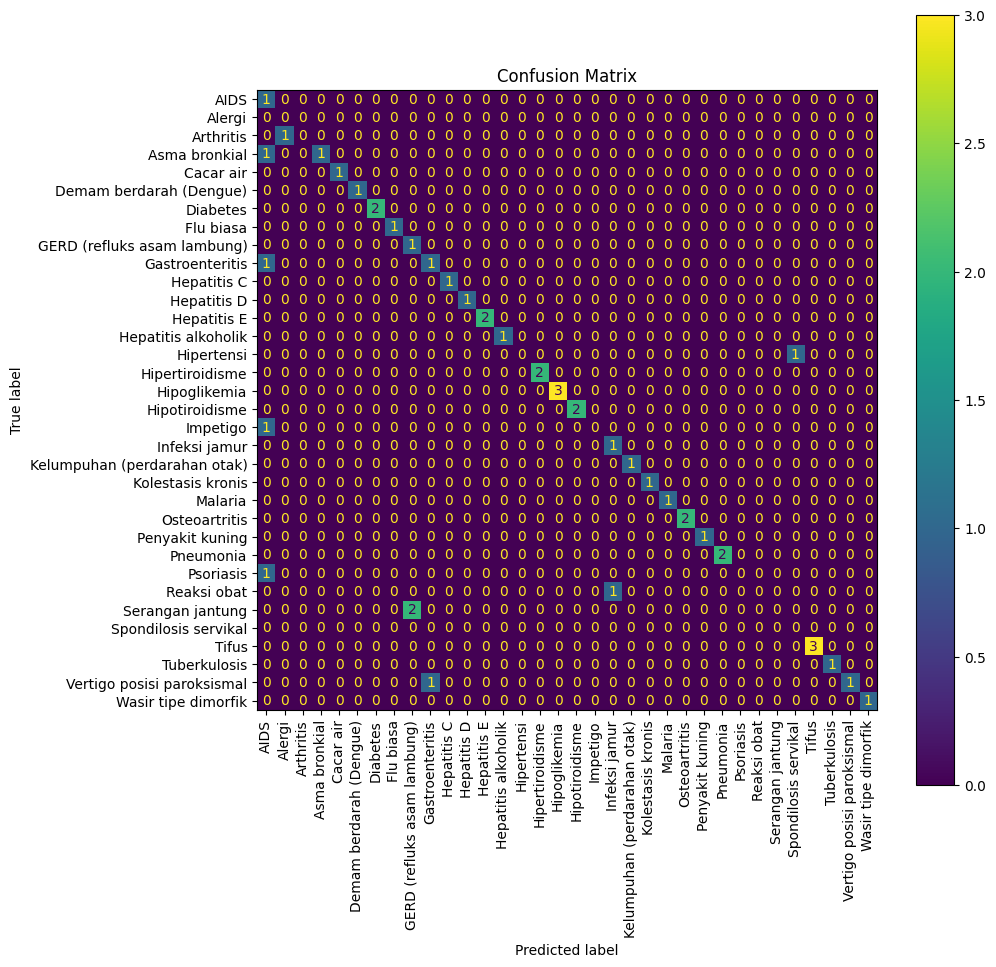

In [ ]:
# confusion matrix dan visualisasi
cm = confusion_matrix(y_test_enc, y_pred)
display_labels = [le.classes_[i] for i in labels_test] # ambil nama kelas yang sesuai dari label encoder

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()